In [1]:
import numpy as np
import sys 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
# import plotly.express as px

In [2]:
import ctypes
import os
# coding=utf-8

pDll = ctypes.CDLL("dependency\PythonDemo.dll")

pDll.OpenSensor.restype = ctypes.c_bool #restype指定返回值类型
IsOpen = pDll.OpenSensor(2)
print(IsOpen)

True


In [23]:
#设置工作模式
#0.Fast
#1.Standard
#2.Precise
#3.SuperPrecise
#4.White
#5.Black
#6.Grid
#7.ExposurePrediction
pDll.SetWorkingMode(2)

#设置曝光次数及曝光模式
#0.Manual
#1.ManualRepeat
#2.AutoNHDR
#3.AutoPHDR
#第一个参数为曝光次数，第二个参数为曝光模式
pDll.SetExposureSettings(3,2)

#设置3D曝光强度，第一个参数为第几次曝光，第二个参数为要设置的曝光强度
pDll.SetSnap3DIntensity.argtypes = [ctypes.c_int, ctypes.c_float]#argtypes指定参数类型
pDll.SetSnap3DIntensity(1,100)

#设置2D曝光强度
pDll.SetSnap2DIntensity.argtypes = [ctypes.c_float]#argtypes指定参数类型
pDll.SetSnap2DIntensity(100)

SensorWidth= 1944 #图像像素宽
SensorHeighth= 1472 #图像像素高
size = SensorWidth * SensorHeighth
#3D同步拍摄
class MPSizectorS_DataFramePY3DStruct(ctypes.Structure): #Structure在ctypes中是基于类的结构体
    _fields_ = [("X", ctypes.c_float * size),
                ("Y", ctypes.c_float * size),
                ("Z", ctypes.c_float * size),
                ("Gray", ctypes.c_ubyte * size),
                ("Mask", ctypes.c_ubyte * size)]

#POINTER(MPSizectorS_DataFramePY3DStruct)表示一个结构体指针
pDll.Snap3D.restype = ctypes.POINTER(MPSizectorS_DataFramePY3DStruct)


In [24]:
#同步拍摄3D图像，p为指向3D图片数据结构体的指针
p = pDll.Snap3D()
print("3D拍摄完成！")

3D拍摄完成！


In [15]:
x = np.asarray(p.contents.X)
y = np.asarray(p.contents.Y)
z = np.asarray(p.contents.Z)
g = np.asarray(p.contents.Gray)

In [26]:
points = np.stack([x,y,z], axis=1)
points.shape

(2861568, 3)

In [30]:
#设置工作模式
#0.Fast
#1.Standard
#2.Precise
#3.SuperPrecise
#4.White
#5.Black
#6.Grid
#7.ExposurePrediction
pDll.SetWorkingMode(5)


#2D同步拍摄
class MPSizectorS_DataFramePY2DStruct(ctypes.Structure): #Structure在ctypes中是基于类的结构体
    _fields_ = [("Gray", ctypes.c_ubyte * size)]
pDll.Snap2D.restype = ctypes.POINTER(MPSizectorS_DataFramePY2DStruct)

#同步拍摄2D图像，m为指向2D图像数据结构体的指针


In [31]:
m = pDll.Snap2D() 

print("2D拍摄完成！")
gray = np.asarray(m.contents.Gray)


2D拍摄完成！


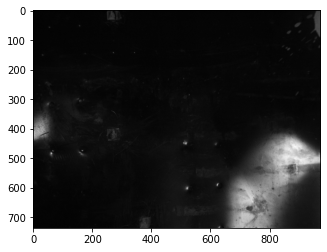

In [32]:
mat = gray[:972*736]
mat = mat.reshape((736, 972))
plt.imshow(mat, cmap="gray")


In [33]:
pDll.CloseSensor()

pDll.Delete()

0

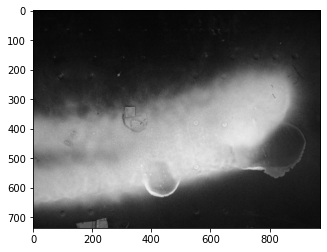

In [44]:
pp = np.load("scan7.npy")
mat = pp[:972*736, 3]
mat = mat.reshape((736, 972))
plt.imshow(mat, cmap="gray")